In [0]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("enigh").getOrCreate()

In [0]:
%matplotlib inline

In [0]:
from pyspark.sql.types import StringType, DateType, FloatType

from pyspark.sql.functions import col, substring, when, countDistinct

In [0]:
import numpy as np
import pandas as pd
import json
import os

pd.set_option('display.max_columns',None)

In [0]:
# %fs rm -r dbfs:/FileStore/tables/enigh/estados.csv

res5: Boolean = true

In [0]:
%fs ls dbfs:/FileStore/tables/enigh/

path name size dbfs:/FileStore/tables/enigh/catalogos/ catalogos/ 0 dbfs:/FileStore/tables/enigh/catalogos-csv/ catalogos-csv/ 0 dbfs:/FileStore/tables/enigh/data_limpia.csv data_limpia.csv 141675188 dbfs:/FileStore/tables/enigh/gastoshogar.txt gastoshogar.txt 103904451

In [0]:
df = spark.read.csv('/FileStore/tables/enigh/data_limpia.csv', header = True)

In [0]:
df = df.withColumn(
    "cantidad", col("cantidad").cast(FloatType())
).withColumn(
    "gasto", col("gasto").cast(FloatType())
).withColumn(
    "gasto_tri", col("gasto_tri").cast(FloatType())
)

In [0]:
#df = spark.read.text('/FileStore/tables/enigh/gastoshogar.txt', lineSep)

# df = spark.read.csv('/FileStore/tables/enigh/gastoshogar.txt', header = True)

In [0]:
df.printSchema()

root
 |-- folioviv: string (nullable = true)
 |-- foliohog: string (nullable = true)
 |-- clave: string (nullable = true)
 |-- mes_dia: string (nullable = true)
 |-- forma_pag1: string (nullable = true)
 |-- lugar_comp: string (nullable = true)
 |-- cantidad: float (nullable = true)
 |-- gasto: float (nullable = true)
 |-- gasto_tri: float (nullable = true)
 |-- clave codificación: string (nullable = true)
 |-- forma_pag1 codificación: string (nullable = true)
 |-- lugar_comp codificación: string (nullable = true)



In [0]:
df_estados = spark.read.csv('/FileStore/tables/enigh/estados.csv', header = True)

In [0]:
df_estados.printSchema()

root
 |-- clave_edo: string (nullable = true)
 |-- Enitidad: string (nullable = true)



In [0]:
df_estados = df_estados.drop('_c2')

In [0]:
%fs ls dbfs:/FileStore/tables/enigh/catalogos-csv/

path name size dbfs:/FileStore/tables/enigh/catalogos-csv/clave.csv clave.csv 34984 dbfs:/FileStore/tables/enigh/catalogos-csv/forma_pag1.csv forma_pag1.csv 275 dbfs:/FileStore/tables/enigh/catalogos-csv/lugar_comp.csv lugar_comp.csv 521

In [0]:
clave_df = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/clave.csv', header = True)
forma_pag1_df = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/forma_pag1.csv', header = True)
lugar_comp_df = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/lugar_comp.csv', header = True)

In [0]:
clave_df.printSchema()
forma_pag1_df.printSchema()
lugar_comp_df.printSchema()

root
 |-- clave: string (nullable = true)
 |-- clave codificación: string (nullable = true)

root
 |-- forma_pag1: string (nullable = true)
 |-- forma_pag1 codificación: string (nullable = true)

root
 |-- lugar_comp: string (nullable = true)
 |-- lugar_comp codificación: string (nullable = true)



# Cruce tablas

In [0]:
df_estados.show()

+---------+--------------------+
|clave_edo|            Enitidad|
+---------+--------------------+
|       01|      Aguascalientes|
|       02|     Baja California|
|       03| Baja California Sur|
|       04|            Campeche|
|       05|Coahuila de Zaragoza|
|       06|              Colima|
|       07|             Chiapas|
|       08|           Chihuahua|
|       09|    Ciudad de México|
|       10|             Durango|
|       11|          Guanajuato|
|       12|            Guerrero|
|       13|             Hidalgo|
|       14|             Jalisco|
|       15|              México|
|       16| Michoacán de Ocampo|
|       17|             Morelos|
|       18|             Nayarit|
|       19|          Nuevo León|
|       20|              Oaxaca|
+---------+--------------------+
only showing top 20 rows



In [0]:
df = df.withColumn('clave_edo', substring(col('folioviv'), 1, 2))

+----------+--------+-----+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+---------+
|  folioviv|foliohog|clave|mes_dia|forma_pag1|lugar_comp|cantidad|gasto|gasto_tri|  clave codificación|forma_pag1 codificación|lugar_comp codificación|clave_edo|
+----------+--------+-----+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+---------+
|0100013606|       1| C001|   null|        01|        06|    null|100.0|    300.0|Detergentes (polv...|               Efectivo|          Supermercados|       01|
|0100013606|       1| C003|   null|        01|        06|    null| 40.0|    120.0|       Blanqueadores|               Efectivo|          Supermercados|       01|
|0100013606|       1| C004|   null|        01|        06|    null| 44.0|    132.0|Suavizantes de telas|               Efectivo|          Supermercados|       01|
|0100013606|       1| C005| 

In [0]:
df_join_edos = df.join(df_estados, ['clave_edo'], 'left')


In [0]:
display(df_join_edos)

clave_edo folioviv foliohog clave mes_dia forma_pag1 lugar_comp cantidad gasto gasto_tri clave codificación forma_pag1 codificación lugar_comp codificación Enitidad 01 0100013606 1 C001 null 01 06 null 100.0 300.0 Detergentes (polvo, líquido, pasta, gel) Efectivo Supermercados Aguascalientes 01 0100013606 1 C003 null 01 06 null 40.0 120.0 Blanqueadores Efectivo Supermercados Aguascalientes 01 0100013606 1 C004 null 01 06 null 44.0 132.0 Suavizantes de telas Efectivo Supermercados Aguascalientes 01 0100013606 1 C005 null 01 06 null 46.0 138.0 Limpiadores (en polvo o líquido) Efectivo Supermercados Aguascalientes 01 0100013606 1 C006 null 01 06 null 32.0 96.0 Servilletas y papel absorbente Efectivo Supermercados Aguascalientes 01 0100013606 1 C010 null 01 06 null 10.0 30.0 Jergas y trapos de cocina Efectivo Supermercados Aguascalientes 01 0100013606 1 C016 null 01 06 null 36.0 108.0 Desodorante ambiental y sanitario Efectivo Supermercados Aguascalientes 01 0100013606 1 D001 null 01 06 null 112.0 336.0 Jabón de tocador Efectivo Supermercados Aguascalientes 01 0100013606 1 D003 null 01 06 null 60.0 180.0 Pasta dental y enjuague bucal Efectivo Supermercados Aguascalientes 01 0100013606 1 D005 null 01 06 null 148.0 444.0 Champús, enjuagues, tratamiento para el cabello Efectivo Supermercados Aguascalientes 01 0100013606 1 D007 null 01 06 null 38.0 114.0 Desodorante y talco Efectivo Supermercados Aguascalientes 01 0100013606 1 D010 null 01 06 null 50.0 150.0 Gel, spray, mousse para el cabello Efectivo Supermercados Aguascalientes 01 0100013606 1 D014 null 01 06 null 88.0 264.0 Papel sanitario, pañuelos desechables Efectivo Supermercados Aguascalientes 01 0100013606 1 D015 null 01 06 null 39.0 117.0 Toallas sanitarias Efectivo Supermercados Aguascalientes 01 0100013606 1 D022 null 01 05 null 180.0 540.0 Corte de cabello y peinado Efectivo Tiendas específicas del ramo Aguascalientes 01 0100013606 1 F003 null 01 null null 400.0 1200.0 Compra de tarjeta para servicio de teléfono celular Efectivo null Aguascalientes 01 0100013606 1 F007 null 01 null null 400.0 1200.0 Gasolina Magna Efectivo null Aguascalientes 01 0100013606 1 J020 null 01 05 null 800.0 782.6 Medicamentos recetados para: diarrea, infecciones y malestar Efectivo Tiendas específicas del ramo Aguascalientes 01 0100017804 1 C001 null 01 06 null 120.0 360.0 Detergentes (polvo, líquido, pasta, gel) Efectivo Supermercados Aguascalientes 01 0100017804 1 C008 null 01 06 null 16.0 48.0 Escobas, trapeadores, recogedor Efectivo Supermercados Aguascalientes 01 0100017804 1 D003 null 01 17 null 85.0 255.0 Pasta dental y enjuague bucal Efectivo Persona particular Aguascalientes 01 0100017804 1 D004 null 01 06 null 60.0 180.0 Hilo y cepillo dental Efectivo Supermercados Aguascalientes 01 0100017804 1 D010 null 01 06 null 40.0 120.0 Gel, spray, mousse para el cabello Efectivo Supermercados Aguascalientes 01 0100017804 1 D011 null 01 06 null 80.0 240.0 Crema para afeitar y rastrillos Efectivo Supermercados Aguascalientes 01 0100017804 1 D017 null 01 05 null 28.0 84.0 Artículos de tocador para bebé, toallas húmedas, talco para bebé Efectivo Tiendas específicas del ramo Aguascalientes 01 0100017804 1 D022 null 01 05 null 50.0 150.0 Corte de cabello y peinado Efectivo Tiendas específicas del ramo Aguascalientes 01 0100017804 1 E014 null 01 null null 265.0 795.0 Libros para la escuela Efectivo null Aguascalientes 01 0100017804 1 F007 null 01 null null 650.0 1950.0 Gasolina Magna Efectivo null Aguascalientes 01 0100017804 1 H086 null 01 17 null 380.0 371.73 Tenis para niño de 0 a 4 años Efectivo Persona particular Aguascalientes 01 0100017804 1 J016 null 01 null null 60.0 58.69 Consultas médico general Efectivo null Aguascalientes 01 0100017804 1 J020 null 01 05 null 110.0 107.6 Medicamentos recetados para: diarrea, infecciones y malestar Efectivo Tiendas específicas del ramo Aguascalientes 01 0100017804 1 J026 null 01 05 null 65.0 63.58 Medicamentos recetados para: fiebre Efectivo Tiendas especí

In [0]:
df_f = df_join_edos.withColumn('area', when(substring(col('folioviv'), 3, 1) == '6', 'rural').otherwise('urbano'))

In [0]:
display(df_f)

clave_edo folioviv foliohog clave mes_dia forma_pag1 lugar_comp cantidad gasto gasto_tri clave codificación forma_pag1 codificación lugar_comp codificación Enitidad area 01 0100013606 1 C001 null 01 06 null 100.0 300.0 Detergentes (polvo, líquido, pasta, gel) Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 C003 null 01 06 null 40.0 120.0 Blanqueadores Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 C004 null 01 06 null 44.0 132.0 Suavizantes de telas Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 C005 null 01 06 null 46.0 138.0 Limpiadores (en polvo o líquido) Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 C006 null 01 06 null 32.0 96.0 Servilletas y papel absorbente Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 C010 null 01 06 null 10.0 30.0 Jergas y trapos de cocina Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 C016 null 01 06 null 36.0 108.0 Desodorante ambiental y sanitario Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D001 null 01 06 null 112.0 336.0 Jabón de tocador Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D003 null 01 06 null 60.0 180.0 Pasta dental y enjuague bucal Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D005 null 01 06 null 148.0 444.0 Champús, enjuagues, tratamiento para el cabello Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D007 null 01 06 null 38.0 114.0 Desodorante y talco Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D010 null 01 06 null 50.0 150.0 Gel, spray, mousse para el cabello Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D014 null 01 06 null 88.0 264.0 Papel sanitario, pañuelos desechables Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D015 null 01 06 null 39.0 117.0 Toallas sanitarias Efectivo Supermercados Aguascalientes urbano 01 0100013606 1 D022 null 01 05 null 180.0 540.0 Corte de cabello y peinado Efectivo Tiendas específicas del ramo Aguascalientes urbano 01 0100013606 1 F003 null 01 null null 400.0 1200.0 Compra de tarjeta para servicio de teléfono celular Efectivo null Aguascalientes urbano 01 0100013606 1 F007 null 01 null null 400.0 1200.0 Gasolina Magna Efectivo null Aguascalientes urbano 01 0100013606 1 J020 null 01 05 null 800.0 782.6 Medicamentos recetados para: diarrea, infecciones y malestar Efectivo Tiendas específicas del ramo Aguascalientes urbano 01 0100017804 1 C001 null 01 06 null 120.0 360.0 Detergentes (polvo, líquido, pasta, gel) Efectivo Supermercados Aguascalientes urbano 01 0100017804 1 C008 null 01 06 null 16.0 48.0 Escobas, trapeadores, recogedor Efectivo Supermercados Aguascalientes urbano 01 0100017804 1 D003 null 01 17 null 85.0 255.0 Pasta dental y enjuague bucal Efectivo Persona particular Aguascalientes urbano 01 0100017804 1 D004 null 01 06 null 60.0 180.0 Hilo y cepillo dental Efectivo Supermercados Aguascalientes urbano 01 0100017804 1 D010 null 01 06 null 40.0 120.0 Gel, spray, mousse para el cabello Efectivo Supermercados Aguascalientes urbano 01 0100017804 1 D011 null 01 06 null 80.0 240.0 Crema para afeitar y rastrillos Efectivo Supermercados Aguascalientes urbano 01 0100017804 1 D017 null 01 05 null 28.0 84.0 Artículos de tocador para bebé, toallas húmedas, talco para bebé Efectivo Tiendas específicas del ramo Aguascalientes urbano 01 0100017804 1 D022 null 01 05 null 50.0 150.0 Corte de cabello y peinado Efectivo Tiendas específicas del ramo Aguascalientes urbano 01 0100017804 1 E014 null 01 null null 265.0 795.0 Libros para la escuela Efectivo null Aguascalientes urbano 01 0100017804 1 F007 null 01 null null 650.0 1950.0 Gasolina Magna Efectivo null Aguascalientes urbano 01 0100017804 1 H086 null 01 17 null 380.0 371.73 Tenis para niño de 0 a 4 años Efectivo Persona particular Aguascalientes urbano 01 0100017804 1 J016 null 01 null null 60.0 58.69 Consultas médico general Efectivo null Aguascalientes urbano 01 0100017804 1 J020 null 01 05 null 110.0 107.6 Medica

# examen

In [0]:
df_f.select(countDistinct('folioviv')).show()

+------------------------+
|count(DISTINCT folioviv)|
+------------------------+
|                   25000|
+------------------------+



In [0]:
df_f.select(countDistinct('folioviv', 'foliohog')).show()

+----------------------------------+
|count(DISTINCT folioviv, foliohog)|
+----------------------------------+
|                             25364|
+----------------------------------+



In [0]:
## respuesta
df_pd = df_f.toPandas()
df_pd.groupby(['forma_pag1 codificación','lugar_comp codificación'],as_index=False,dropna=False).agg({'gasto':'sum'}).sort_values('gasto',ascending=False)

forma_pag1 codificación 
 lugar_comp codificación 
 gasto 
 
 
 
 
 34 
 Efectivo 
 NaN 
 75282936.0 
 
 
 32 
 Efectivo 
 Tiendas específicas del ramo 
 69836392.0 
 
 
 139 
 NaN 
 NaN 
 64853952.0 
 
 
 23 
 Efectivo 
 Persona particular 
 37410920.0 
 
 
 26 
 Efectivo 
 Supermercados 
 19168826.0 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 35 
 Fiado (persona particular o establecimiento co... 
 Cafeterías 
 36.0 
 
 
 8 
 Domiciliación 
 Mercado 
 35.0 
 
 
 49 
 Fiado (persona particular o establecimiento co... 
 Tiendas de conveniencia 
 10.0 
 
 
 69 
 Pago móvil 
 Tiendas de abarrotes 
 9.0 
 
 
 3 
 Cheque 
 Tianguis o mercado sobre ruedas 
 7.0 
 
 
 
 140 rows × 3 columns

# Exploración

## Viz

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_pd = df_f.toPandas()

In [0]:
pd_urbano = df_pd[df_pd['area'] == 'urbano']

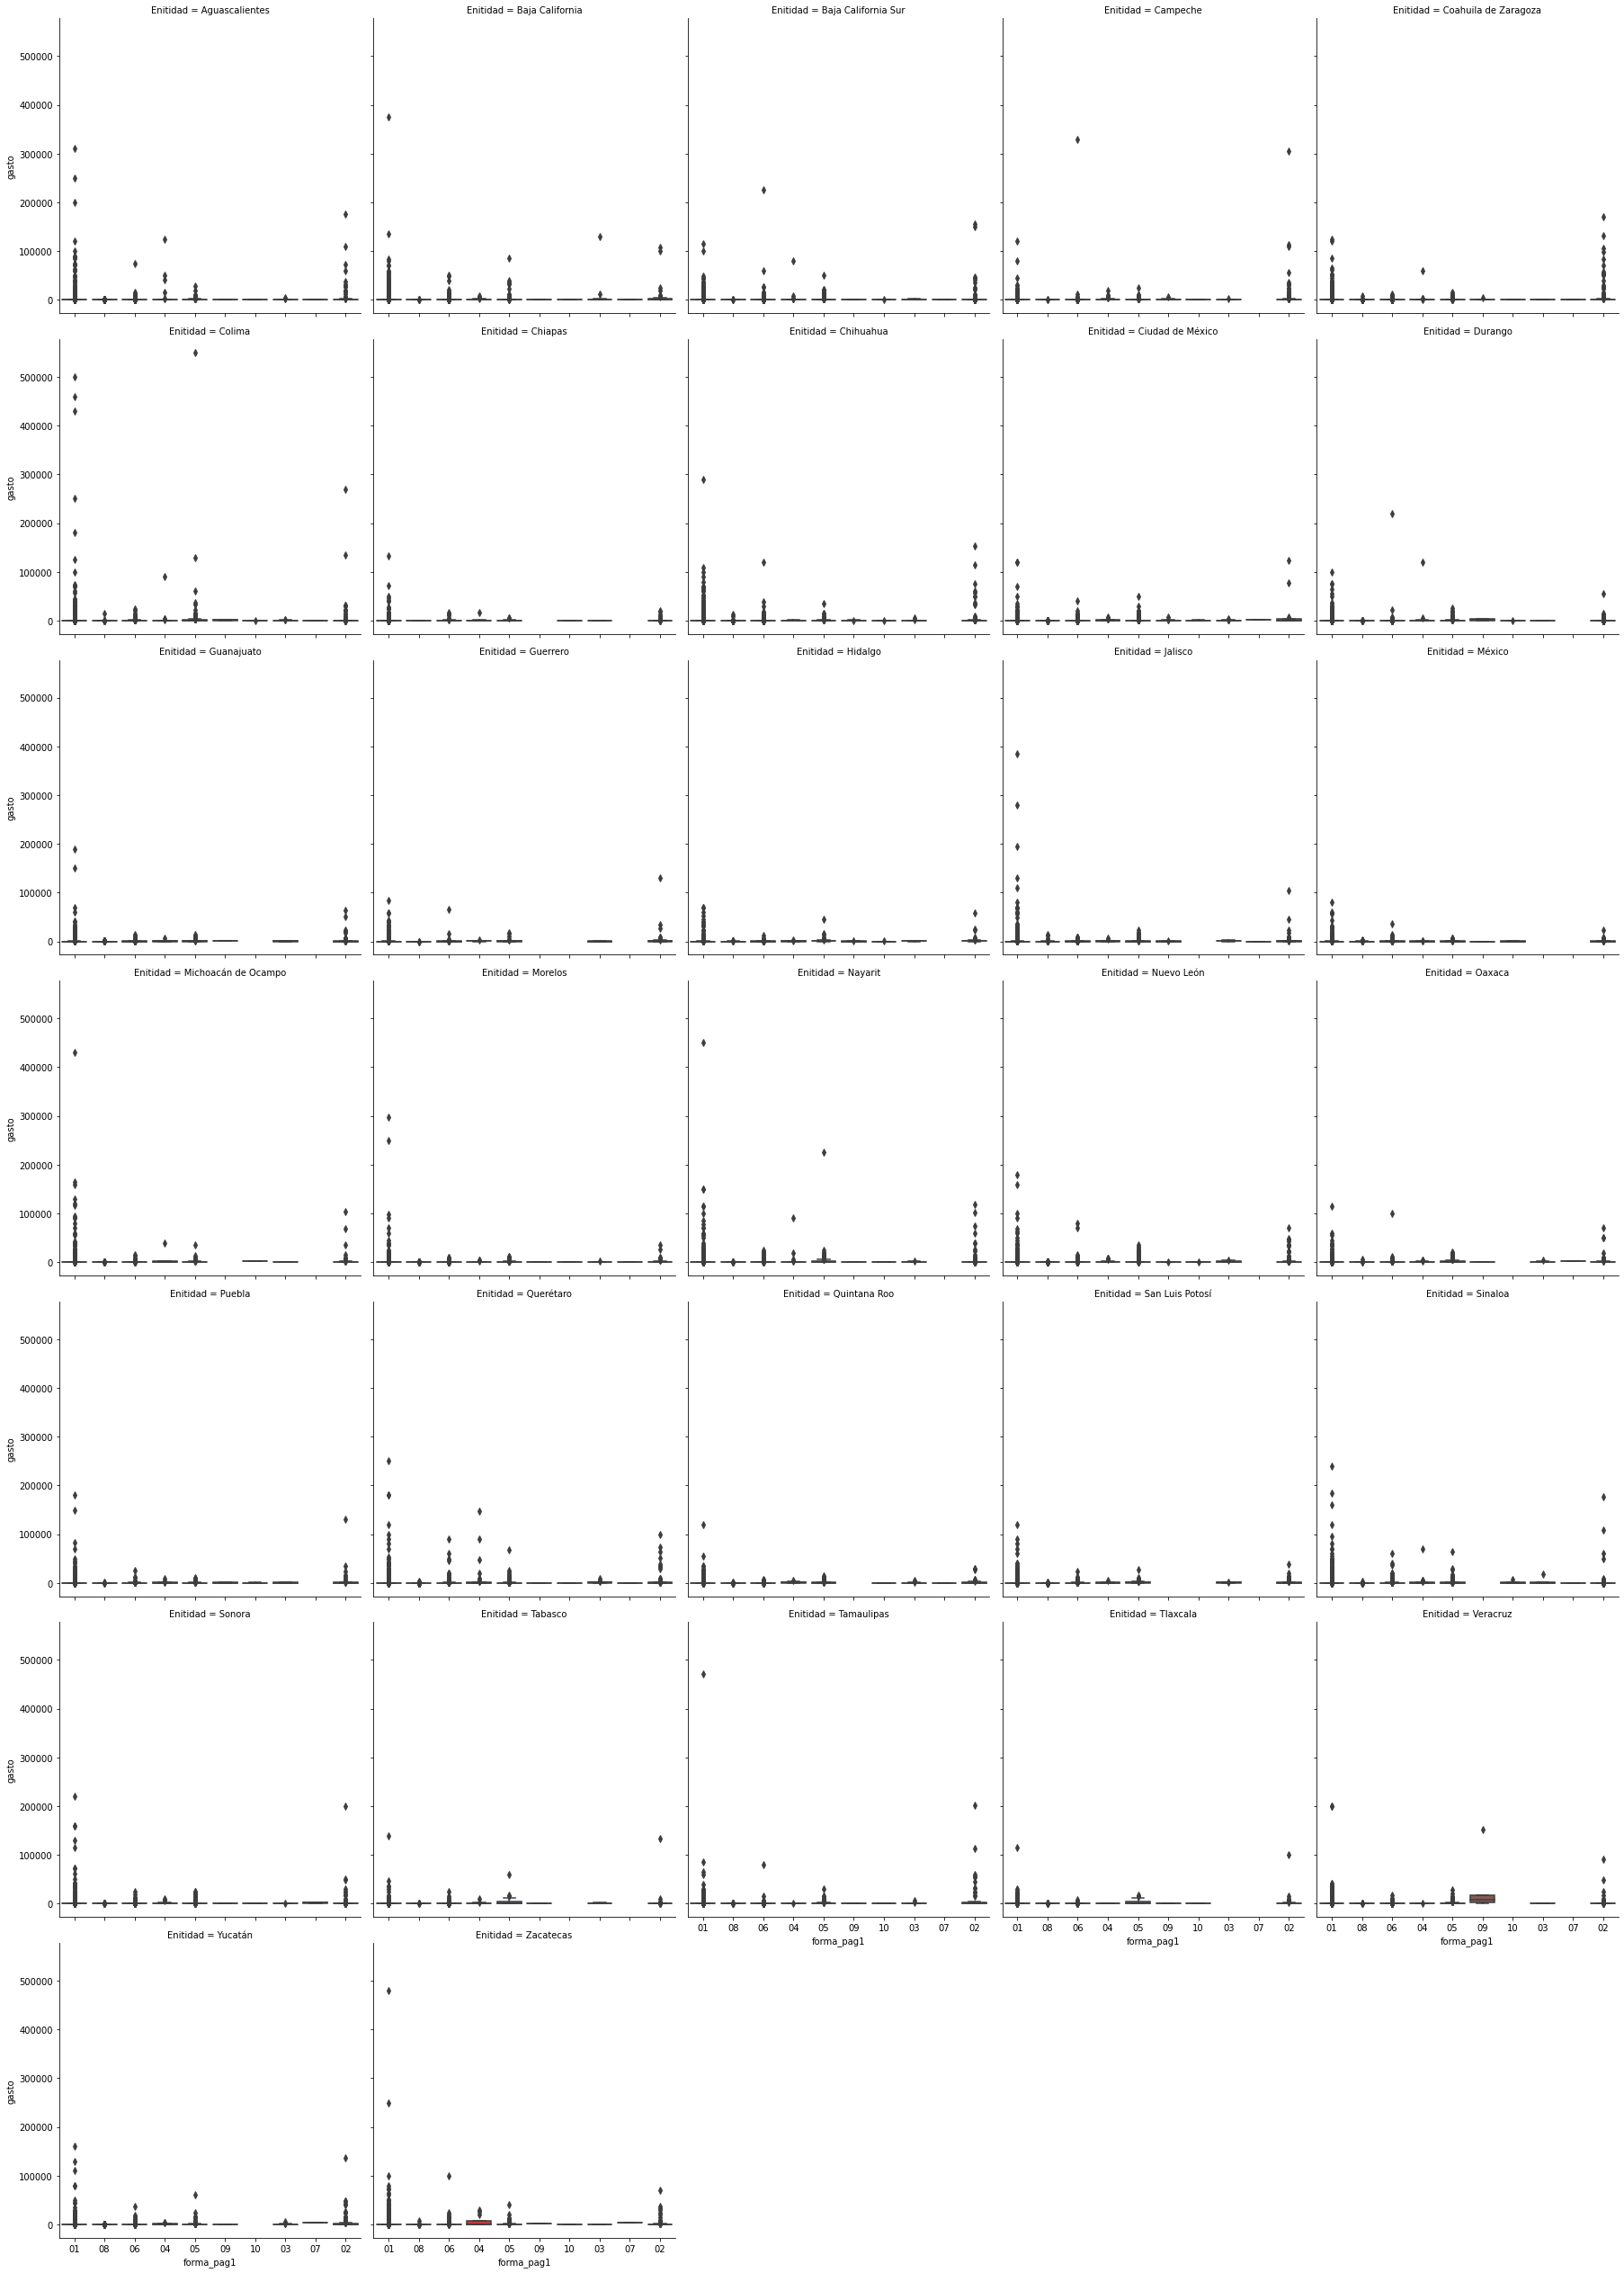

In [0]:
sns.catplot(data = df_pd,
            x = 'forma_pag1',
            y = 'gasto',
            kind = 'box',
            col="Enitidad",
            col_wrap=5
)
plt.show()

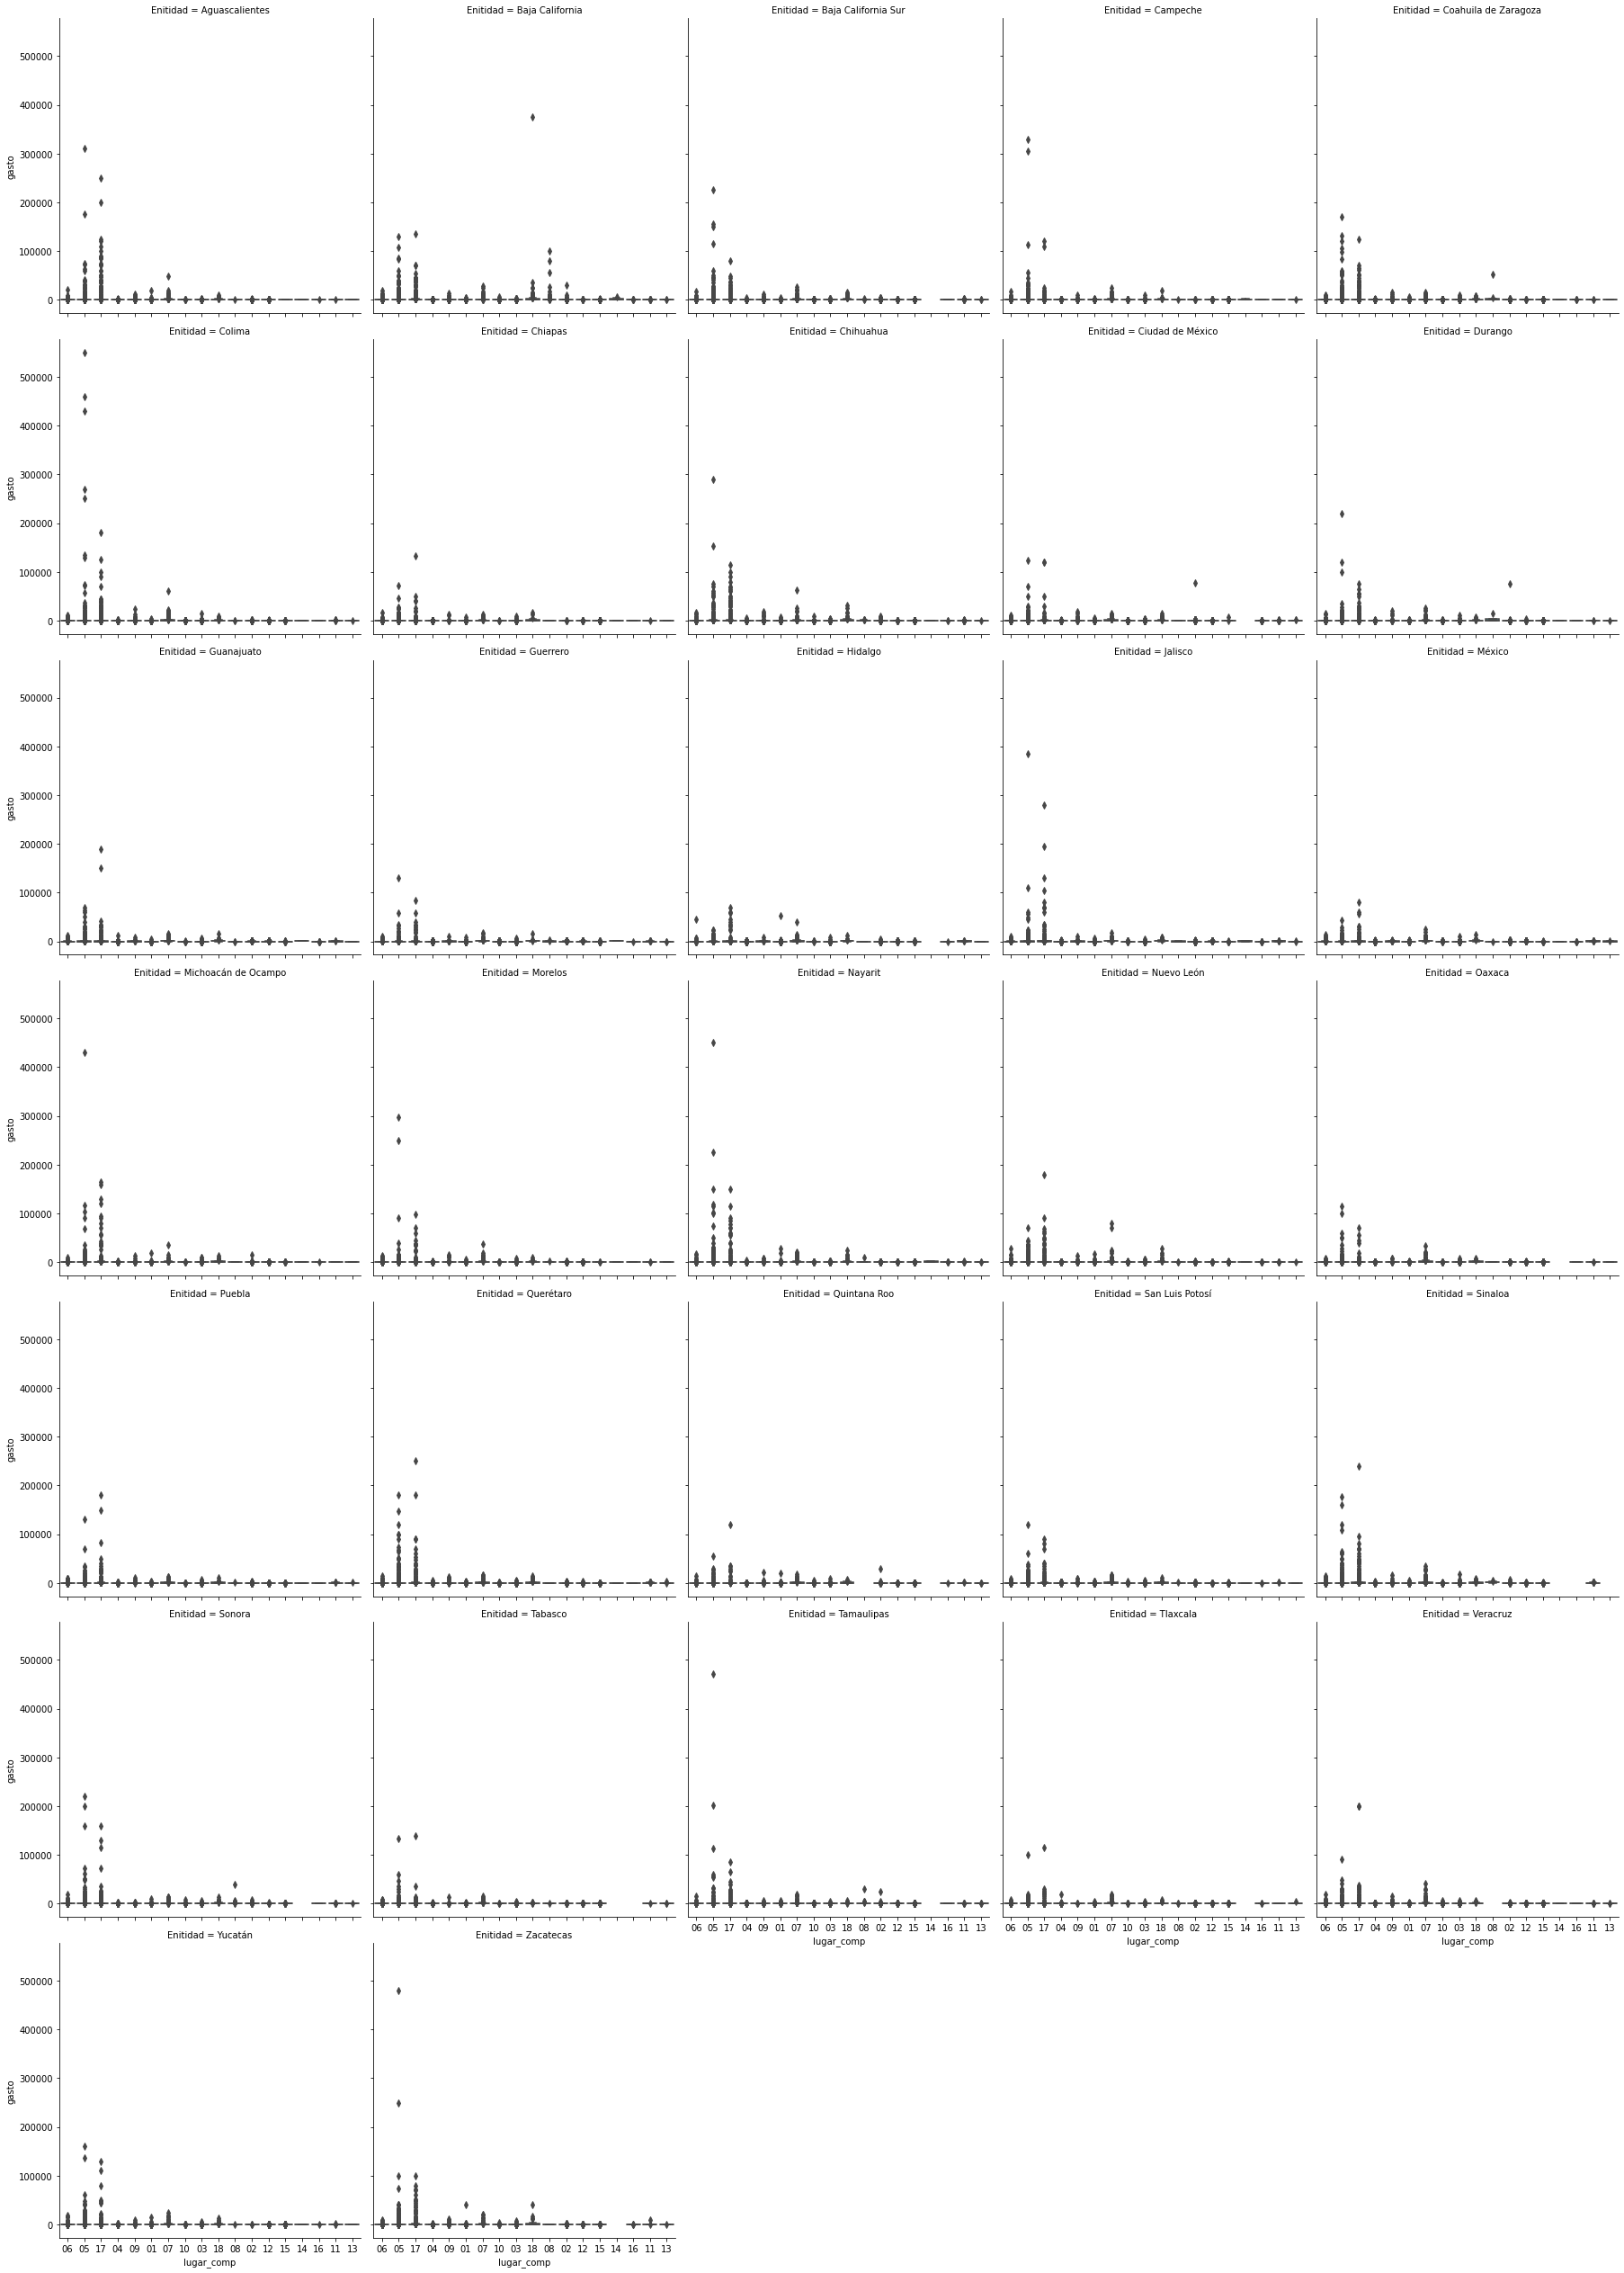

In [0]:
sns.catplot(data = df_pd,
            x = 'lugar_comp',
            y = 'gasto',
            kind = 'box',
            col="Enitidad",
            col_wrap=5
)
plt.show()

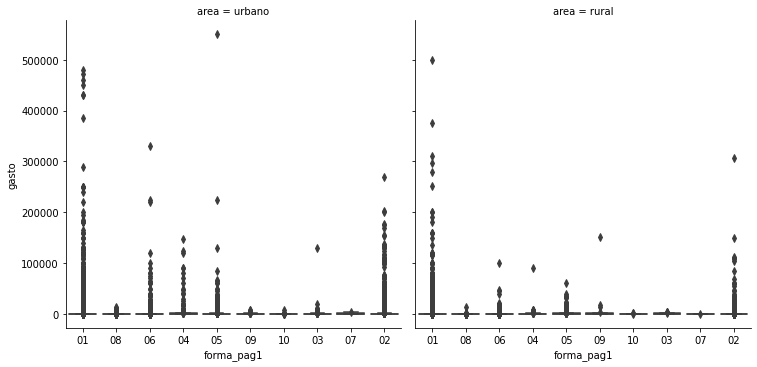

In [0]:
sns.catplot(data = df_pd,
            x = 'forma_pag1',
            y = 'gasto',
            kind = 'box',
            col="area",
            col_wrap=5
)
plt.show()

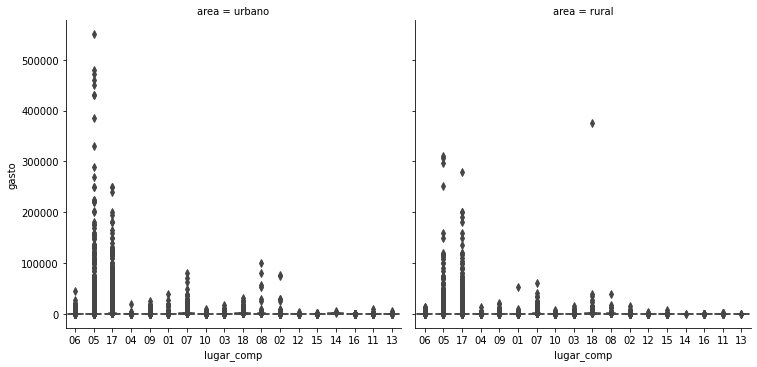

In [0]:
sns.catplot(data = df_pd,
            x = 'lugar_comp',
            y = 'gasto',
            kind = 'box',
            col="area",
            col_wrap=5
)
plt.show()

## analisis